<a href="https://colab.research.google.com/github/vinayshanbhag/math/blob/master/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine

In [4]:
X, y = load_wine(return_X_y=True)

In [5]:
X.shape, y.shape

((178, 13), (178,))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=1)

In [8]:
X_train.shape

(124, 13)

### Scale features
$X_{std} = \frac{(X - \mu)}{\sigma}$

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

### Covariance


In [11]:
import numpy as np

In [14]:
cov_mat = np.cov(X_train_std.T)

### Eigen Decomposition of the covariance matrix

In [15]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

In [16]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

In [18]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [19]:
total_var = np.sum([i[0] for i in eigen_pairs])

In [23]:
expl_var = [i[0]/total_var for i in eigen_pairs]

In [25]:
cumulative_var = np.cumsum(expl_var)
cumulative_var

array([0.35935182, 0.56049075, 0.67931604, 0.75060008, 0.81555618,
       0.85912266, 0.89457445, 0.92339001, 0.94442776, 0.9644992 ,
       0.98064876, 0.99205753, 1.        ])

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

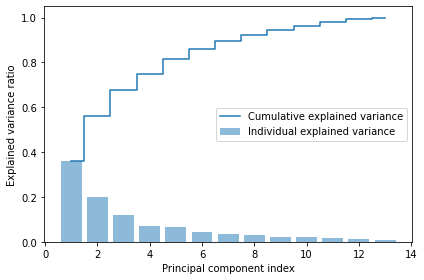

In [28]:
plt.bar(range(1,14), expl_var, alpha=0.5, align='center',label='Individual explained variance')
plt.step(range(1,14), cumulative_var, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

First two principal components account for roughly 60% of the explained variance

In [29]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))
w

array([[-0.14119433, -0.46732089],
       [ 0.24946815, -0.26876924],
       [-0.05104853, -0.27660192],
       [ 0.19890851,  0.01955098],
       [-0.1444494 , -0.32120489],
       [-0.40472564, -0.04839313],
       [-0.42654202,  0.00936768],
       [ 0.29573373, -0.00146817],
       [-0.32620144, -0.04087554],
       [ 0.07420694, -0.53982087],
       [-0.29277478,  0.27536907],
       [-0.37482201,  0.19149315],
       [-0.2889145 , -0.34828709]])

In [32]:
X_train_pca = X_train_std.dot(w)
#X_train_pca

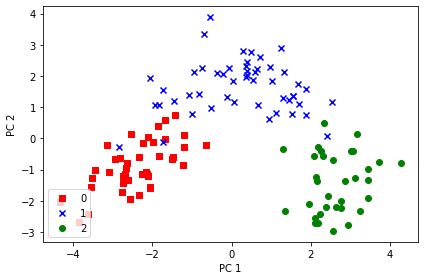

In [33]:
colors =list('rbg')
markers=list('sxo')
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c,
                label=l,
                marker=m
               )
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()